In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Lung Cancer.csv to Lung Cancer (2).csv


In [ ]:
import pandas as pd

df = pd.read_csv("Lung Cancer.csv")
df.head()


,id,age,gender,country,diagnosis_date,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
0,1,64.0,Male,Sweden,2016-04-05,Stage I,Yes,Passive Smoker,29.4,199,0,0,1,0,Chemotherapy,2017-09-10,0
1,2,50.0,Female,Netherlands,2023-04-20,Stage III,Yes,Passive Smoker,41.2,280,1,1,0,0,Surgery,2024-06-17,1
2,3,65.0,Female,Hungary,2023-04-05,Stage III,Yes,Former Smoker,44.0,268,1,1,0,0,Combined,2024-04-09,0
3,4,51.0,Female,Belgium,2016-02-05,Stage I,No,Passive Smoker,43.0,241,1,1,0,0,Chemotherapy,2017-04-23,0
4,5,37.0,Male,Luxembourg,2023-11-29,Stage I,No,Passive Smoker,19.7,178,0,0,0,0,Combined,2025-01-08,0


In [ ]:
df.dtypes

,0
id,int64
age,float64
gender,object
country,object
diagnosis_date,object
cancer_stage,object
family_history,object
smoking_status,object
bmi,float64
cholesterol_level,int64


In [ ]:
# Columns for label encoding
label_cols = ["gender", "family_history", "cancer_stage", "country"]

for col in label_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

    # Print mapping: Encoded value -> Original label
    print(f"\nMapping for '{col}':")
    mapping = {index: label for index, label in enumerate(le.classes_)}
    print(mapping)

    # Optional: Display as DataFrame
    mapping_df = pd.DataFrame({
        'Encoded': list(mapping.keys()),
        'Original': list(mapping.values())
    })
    print(mapping_df)


Mapping for 'gender':
{0: 'Female', 1: 'Male'}
   Encoded Original
0        0   Female
1        1     Male

Mapping for 'family_history':
{0: 'No', 1: 'Yes'}
   Encoded Original
0        0       No
1        1      Yes

Mapping for 'cancer_stage':
{0: 'Stage I', 1: 'Stage II', 2: 'Stage III', 3: 'Stage IV'}
   Encoded   Original
0        0    Stage I
1        1   Stage II
2        2  Stage III
3        3   Stage IV

Mapping for 'country':
{0: 'Austria', 1: 'Belgium', 2: 'Bulgaria', 3: 'Croatia', 4: 'Cyprus', 5: 'Czech Republic', 6: 'Denmark', 7: 'Estonia', 8: 'Finland', 9: 'France', 10: 'Germany', 11: 'Greece', 12: 'Hungary', 13: 'Ireland', 14: 'Italy', 15: 'Latvia', 16: 'Lithuania', 17: 'Luxembourg', 18: 'Malta', 19: 'Netherlands', 20: 'Poland', 21: 'Portugal', 22: 'Romania', 23: 'Slovakia', 24: 'Slovenia', 25: 'Spain', 26: 'Sweden'}
    Encoded        Original
0         0         Austria
1         1         Belgium
2         2        Bulgaria
3         3         Croatia
4         4  

In [ ]:
df.head()

,id,age,gender,country,diagnosis_date,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
0,1,64.0,1,26,2016-04-05,0,1,Passive Smoker,29.4,199,0,0,1,0,Chemotherapy,2017-09-10,0
1,2,50.0,0,19,2023-04-20,2,1,Passive Smoker,41.2,280,1,1,0,0,Surgery,2024-06-17,1
2,3,65.0,0,12,2023-04-05,2,1,Former Smoker,44.0,268,1,1,0,0,Combined,2024-04-09,0
3,4,51.0,0,1,2016-02-05,0,0,Passive Smoker,43.0,241,1,1,0,0,Chemotherapy,2017-04-23,0
4,5,37.0,1,17,2023-11-29,0,0,Passive Smoker,19.7,178,0,0,0,0,Combined,2025-01-08,0


In [ ]:
print("Smoking Status:", df['smoking_status'].unique())
print("Treatment Type:", df['treatment_type'].unique())

# Columns to one-hot encode
one_hot_cols = ["smoking_status", "treatment_type"]

# Apply one-hot encoding and drop original columns
df_encoded = pd.get_dummies(df, columns=one_hot_cols, prefix=one_hot_cols, drop_first=False)


Smoking Status: ['Passive Smoker' 'Former Smoker' 'Never Smoked' 'Current Smoker']
Treatment Type: ['Chemotherapy' 'Surgery' 'Combined' 'Radiation']


In [ ]:
# ---- 2. Smoking status (one-hot encoding) ----
smoking_dummies = pd.get_dummies(df["smoking_status"], prefix="smoking")
df = pd.concat([df, smoking_dummies], axis=1)
df = df.drop("smoking_status", axis=1)  # Remove original column



In [ ]:
# ---- 3. Treatment type (one-hot encoding) ----
treatment_dummies = pd.get_dummies(df["treatment_type"], prefix="treatment")
df = pd.concat([df, treatment_dummies], axis=1)
df = df.drop("treatment_type", axis=1)  # Remove original column

df.head(5)

,id,age,gender,country,diagnosis_date,cancer_stage,family_history,bmi,cholesterol_level,hypertension,...,end_treatment_date,survived,smoking_Current Smoker,smoking_Former Smoker,smoking_Never Smoked,smoking_Passive Smoker,treatment_Chemotherapy,treatment_Combined,treatment_Radiation,treatment_Surgery
0,1,64.0,1,26,2016-04-05,0,1,29.4,199,0,...,2017-09-10,0,False,False,False,True,True,False,False,False
1,2,50.0,0,19,2023-04-20,2,1,41.2,280,1,...,2024-06-17,1,False,False,False,True,False,False,False,True
2,3,65.0,0,12,2023-04-05,2,1,44.0,268,1,...,2024-04-09,0,False,True,False,False,False,True,False,False
3,4,51.0,0,1,2016-02-05,0,0,43.0,241,1,...,2017-04-23,0,False,False,False,True,True,False,False,False
4,5,37.0,1,17,2023-11-29,0,0,19.7,178,0,...,2025-01-08,0,False,False,False,True,False,True,False,False


In [ ]:
from sklearn.preprocessing import LabelEncoder


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: make plots prettier
sns.set(style="whitegrid")


In [ ]:
categorical_cols = [
    'gender',
    'country',
    'cancer_stage',
    'family_history',
    'smoking_Current Smoker',
    'smoking_Former Smoker',
    'smoking_Never Smoked',
    'smoking_Passive Smoker',
    'treatment_Chemotherapy',
    'treatment_Combined',
    'treatment_Surgery',

]



In [ ]:
# List of categorical/binary columns in your current dataset
cols_to_check = [
    'gender',
    'country',
    'cancer_stage',
    'family_history',
    'smoking_Current Smoker',
    'smoking_Former Smoker',
    'smoking_Never Smoked',
    'smoking_Passive Smoker',
    'treatment_Chemotherapy',
    'treatment_Combined',
    'treatment_Surgery',
]

# Loop through each column
for col in cols_to_check:
    # Calculate the percentage of each class (0/1 for binaries, 1-4 for cancer_stage)
    class_percent = df[col].value_counts(normalize=True) * 100  # normalize=True converts counts to percentages

    # Print the column name and class percentages
    print(f"Class balance (percentages) for '{col}':\n{class_percent.round(1)}%\n")
    # round(1) → rounds percentages to 1 decimal for readability


Class balance (percentages) for 'gender':
gender
1    50.0
0    50.0
Name: proportion, dtype: float64%

Class balance (percentages) for 'country':
country
18    3.7
13    3.7
21    3.7
9     3.7
26    3.7
3     3.7
11    3.7
25    3.7
19    3.7
6     3.7
24    3.7
1     3.7
12    3.7
22    3.7
20    3.7
14    3.7
10    3.7
7     3.7
5     3.7
16    3.7
23    3.7
0     3.7
8     3.7
17    3.7
4     3.7
15    3.7
2     3.7
Name: proportion, dtype: float64%

Class balance (percentages) for 'cancer_stage':
cancer_stage
2    25.0
3    25.0
0    25.0
1    25.0
Name: proportion, dtype: float64%

Class balance (percentages) for 'family_history':
family_history
0    50.0
1    50.0
Name: proportion, dtype: float64%

Class balance (percentages) for 'smoking_Current Smoker':
smoking_Current Smoker
False    75.1
True     24.9
Name: proportion, dtype: float64%

Class balance (percentages) for 'smoking_Former Smoker':
smoking_Former Smoker
False    75.0
True     25.0
Name: proportion, dtype: float64%

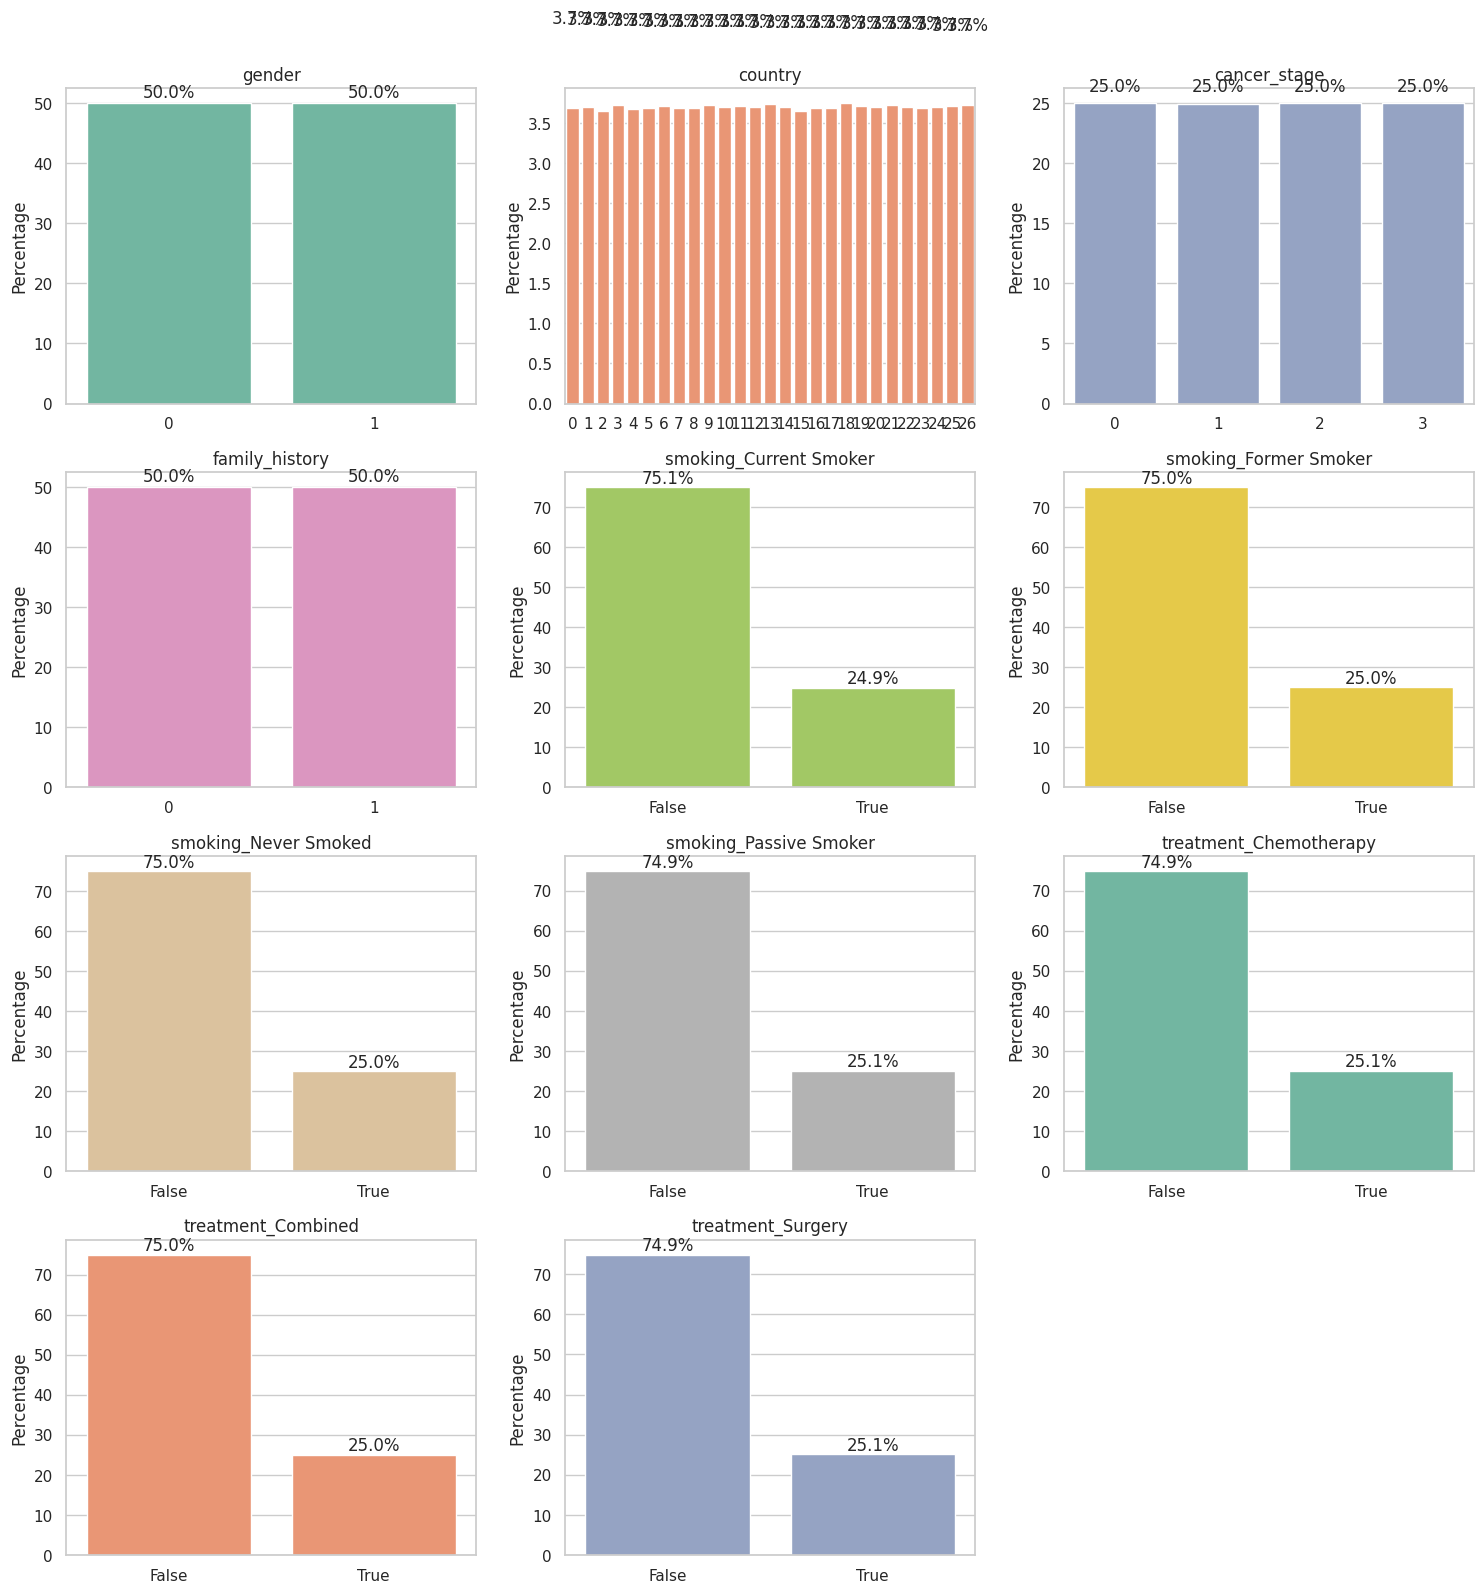

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Make plots look nicer
sns.set(style="whitegrid")

# List of categorical/binary columns we want to visualize
categorical_cols = [
    'gender',
    'country',
    'cancer_stage',
    'family_history',
    'smoking_Current Smoker',
    'smoking_Former Smoker',
    'smoking_Never Smoked',
    'smoking_Passive Smoker',
    'treatment_Chemotherapy',
    'treatment_Combined',
    'treatment_Surgery',
]

# Generate a list of colors (one for each chart)
colors = sns.color_palette("Set2", len(categorical_cols))  # "Set2" is a nice palette

# Decide grid layout for subplots
n_cols = 3  # number of columns in the figure grid
n_rows = (len(categorical_cols) + n_cols - 1) // n_cols  # calculate rows needed

# Create a figure large enough for all charts
plt.figure(figsize=(n_cols*5, n_rows*4))

# Loop through each categorical column
for i, col in enumerate(categorical_cols):
    plt.subplot(n_rows, n_cols, i+1)  # create a subplot for the current column

    # Calculate percentage of each class in this column
    class_counts = df[col].value_counts(normalize=True) * 100  # convert counts to percentages

    # Draw a bar chart for this column, using a unique color
    sns.barplot(x=class_counts.index, y=class_counts.values, color=colors[i])

    # Add percentage labels on top of each bar
    for j, value in enumerate(class_counts.values):
        plt.text(j, value + 1, f'{value:.1f}%', ha='center')  # +1 moves text slightly above the bar

    # Add title and labels
    plt.title(col)           # name of the column as chart title
    plt.ylabel('Percentage') # y-axis shows percentage
    plt.xlabel('')           # remove x-axis label for clarity

# Adjust layout to prevent overlap
plt.tight_layout()

# Display all charts in one figure
plt.show()
